[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/NNDesignDeepLearning/NNDesignDeepLearning/blob/master/05.PythonChapter/Code/ChapterNotebook/PythonChapter.ipynb)

# Objective

One reason that there has been significant progress in deep learning is the availability of open source software tools (generally referred to as frameworks) for implementing deep networks. In this textbook we will interleave theoretical discussions with discussions of these frameworks.  The interface most commonly used to access the frameworks is the Python programming language. In this chapter we provide a brief introduction to Python and a few of its most commonly used packages. 

# Theory and Examples

There are a number of open source software tools for developing deep neural networks. Many of these tools are called **frameworks**. A software framework provides a high-level interface for accessing a library of modular and highly optimized low-level functions. In the case of the deep learning frameworks, the low-level functions implement elementary neural network operations, like matrix multiplication, efficiently on CPUs or GPUs.

The two most popular frameworks are TensorFlow and PyTorch, which we will cover in later chapters of this text. Both of these frameworks have a Pythonic interface. In this chapter, to lay the groundwork for the framework chapters, we will first review some of the key Python concepts that are most important to the use of deep learning frameworks. In addition to the Python core, this chapter will also cover two important Python packages, NumPy and Pandas, which are very commonly used in deep learning workflows for loading and preparing data for training.

## Python

Python is a high-level, interpreted, general-purpose programming language created by Guido van Rossum and first released in 1991. It is currently the most popular language for machine learning, because of its balance of simplicity, flexibility and performance.  Almost all of the deep learning frameworks are implemented with Python on the surface and C, C++ or CUDA (for GPU programming) under the hood. Python is open-source, with thousands of third-party modules (extensions, libraries). These include Keras, TensorFlow and PyTorch.

In this subsection, we will provide a brief introduction to the key features of Python that we will use for deep learning. To enter the Python interactive mode, type `python` at the system prompt, which will give the Python prompt `>>>`. Once in interactive mode, when you type a command, it will be executed immediately.

### Variables 
Variables in Python are dynamically typed. If you enter an integer value for a variable, it will be typed as integer, but if you include a decimal point, it will be typed as floating point, as in the following example.


In [1]:
a = 2
b = 5
c = a + b
print(c)

5


In [ ]:
d = 3.0
a/b

In [ ]:
a/d

### Lists
An important compound data type in Python is the **list** A list can be written as a series of items, separated by commas, inside square brackets. They can be **indexed** (accessing individual elements by their position in the list) and **sliced** (selecting a subset of a list), as in the following examples.

> Indexing in Python begins with 0.

> You can access the last element of a list with the index -1.

> You can add comments to code using the # symbol.

In [ ]:
a = [2, 4, 6, 8]
print(a[0])

In [ ]:
print(a[-1]) # neg. index cnts from right

In [ ]:
a[1:3] = [] # remove elements 1 and 2
print(a)

### Tuple

A tuple is similar to a list, but the tuple is **immutable**, which means that it cannot be changed after it is created. The list is **mutable**, which means that it is not write-protected, and therefore not as safe as a tuple. We will sometimes use tuples to pass inputs and targets into a training function.

> A tuple is a list of items separated by a comma.

In [ ]:
a = 2, 4, 6, 8
print(a)

In [ ]:
print(a[0])

In [ ]:
a[0] = 9

> This error occurs when you try to change a tuple.

### Dictionaries

Dictionaries are another useful data type in Python. A dictionary is a set of key-value pairs, where the key can be any immutable object (object that cannot be changed). A dictionary can be created by putting a comma-separated list of key:value pairs inside a set of braces. Here we create a dictionary that contains inputs and targets that could be used to train a neural network.

In [ ]:
dict = {'input': [1, 3, 7], 'target':[3, 7, 15]}

You can access a value by using the key.

In [ ]:
print(dict['input'])

In [ ]:
print(dict.items())

In [ ]:
print(dict.keys())

### If Statement

In addition to calculator functions, Python has the usual control flow tools that are found in other programming languages, such as the **if** statement. The first `if` can be followed by an `else`, or any number of `elif`'s, or it can be used alone. Unlike some other languages, Python uses indentation to group statements, so there is no `end` statement. Use the tab or spaces to create the indentation, but be careful to keep the exact spacing, and use a colon (`:`) at the end of the `if`, `elif` and `else` lines.

> The standard Python convention is to use 4 spaces for indenting and not to use tabs.

In [ ]:
x = -5
if x<0:
    y = -1
elif x>0:
    y = 1
else:
    y = 0
print(y)

### While Loop

Another control flow tool is the **while** loop, as shown in the following example.

In [ ]:
a = [1, 2, 3, 4]
i, x = 0, 0  #Multiple assignment
while i<len(a): 
    x = x + a[i]
    i = i + 1

print(x)

### For Loop

Python also has **for** loops that can be used to iterate over the items of any list.

In [ ]:
x = 0
for num in a:
    x = x + num

print(x)

The index variable does not have to be an integer.

In [ ]:
a = ['one', 'two', 'three', 'four']
for q in a:
    print(q)

For loops can also be used in **list comprehensions** to create lists.

In [ ]:
a = [1, 2, 3, 4]
b = [x**2 for x in a]
print(b)

### Logical Operators

The logical operators in Python are `and`, `or` and `not`.

In [ ]:
x, y = True, False
print(x and y)
print(x or y)
print(not x)

### Functions

The keyword `def` introduces the function definition. It is followed by the function name and parenthetical parameters. The body must be indented.

In [ ]:
def f(y,q): 
    return [y*y, 1/q]

The `return` line indicates which variables will be returned from the function.

In [ ]:
zw = f(4.0,2.0)
print(zw)

### Iterators and Generators

Python **containers**, like `list`, `dict` and `tuple`, are **iterables**, which means that they can be iterated over. Technically, the `for` statement calls the `iter()` method with the container as the argument, which returns an **iterator** object. The iterator object has a method `__next__` that accesses elements in the container one at a time. An iterator keeps an internal state, so it knows how to compute the next element.

The operation of iterating over objects in a container is important for training neural networks, since we generally need to bring data into the training process in an iterative way. The procedures for doing this will be critical, especially when data sets are too large to fit into memory at one time, or when processing is to be distributed across multiple CPUs and GPUs. 

A **generator** is a special type of iterator. It is written like a function, but with the `return` statement replaced by a `yield` statement. The `yield` statement pauses the function so that it can resume where it left off. Here is a generator that returns elements of a list two at a time. 

In [ ]:
def bytwo(x):
    n = len(x)
    for i in range(0, n-1, 2):
        yield x[i:i+2]

> The `range` function generates arithmetic progressions from an initial value to a final value by some increment.

In [ ]:
a=[1, 2, 3, 4]
zz = bytwo(a)
for qq in zz:
    print(qq)

### Modules

After an interactive Python session is closed, all definitions are lost. In order to save definitions, they can be written to a file and then later imported. This type of file is called a **module**. Definitions in a module can be imported into other modules or the main function. For example, assume the file `logic.py` contains the following.

In [ ]:
def a(x,y): 
    print(x and y)

def o(x,y):
    print(x or y)

We can call this module's functions with the following syntax.

In [ ]:
import logic
logic.a(True,False)
logic.o(True,False)

Later we will be importing definitions from Keras, TensorFlow and PyTorch.

### Classes

Classes are a way to combine data and functionality. Constructing a new class makes a new object and associated **methods** that can modify the object. (Methods are functions that are associated with a specific class of objects.) For example, enter the following commands in the file `testSimplenet.py` to define a new object, which is a simple one-layer network with one input and one neuron. It has a simulation method, which defines how the network operates.

In [ ]:
class simplenet:
    def __init__(self,weight,bias):
        self.w = weight
        self.b = bias
        
    def sim(self,p):
        return self.w*p + self.b

The `__init__` method is executed when an instance is created. The `sim` function is a method for the simplenet class.

You can then create an instance of the class `simplenet` and simulate it.

In [ ]:
from testSimplenet import *
net = simplenet(4.0,2.0)
print(net.sim(3.0))

## Numpy

NumPy is the fundamental module for scientific computing in Python. NumPy functionality works conveniently with the deep learning frameworks we cover in this book, so let's consider some of its key components and concepts.

The key object in NumPy is the multidimensional array (tensor), which can be used to hold inputs and outputs of neural networks. An array can be constructed using the `array` function. The key attributes of an array are: `ndim` -- the number of dimensions, `shape` -- the sizes of each dimension, and `dtype` -- the type of the elements in the array.

In [ ]:
import numpy as np
x = np.array([[1, 2, 3],[4, 5, 6]])
print(x)
print(x.ndim)
print(x.shape)
print(x.dtype)

### Array Operations

A number of operations can be performed between arrays: adding, subtracting, multiplying (dot and Hadamard) and dividing. To demonstrate, create some arrays of various sizes.

In [ ]:
a = np.arange(6)
print(a)

> The `arange` function returns evenly spaced values in a range. If we use only one argument, the initial value is zero, the increment is one and the argument is the total number of values.

In [ ]:
b = a.reshape(2,3)
print(b)
c = np.arange(0,12,2).reshape(2,3)
print(c)
d = np.arange(0,24,4).reshape(3,2)
print(d)

> The `reshape` method rearranges the elements in the array to have the specified numbers of elements in each dimension.

In [ ]:
e = np.arange(3)
print(e)

> The first dimension can be considered to be the number of rows, so `e` is a column vector, although displayed as a row here.

There are two types of array multiplication. The first is a Hadamard (or element-by-element) multiplication. The second is standard matrix multiplication.

In [ ]:
print(b*c)

> The * represents Hadamard multiplication. The two arrays should be the same size.

In [ ]:
print(np.matmul(c,d))

 > For standard matrix muliplications (same as `dot` product for two dimensional arrays), columns of `c` must match rows of `d`.

We can also add arrays. Notice that in the second example the two arrays are not the same dimension. When the arrays are not the same dimension, the smaller array is **broadcast** across the larger array so that they have compatible shapes.

In [ ]:
print(b+c)
print(b+e)

### Indexing and Slicing

As with lists, you can access individual elements of an array with **indexing** or subsets of an array with **slicing**.

In [ ]:
print(b[1, 2])
print(b[0])
print(b[[0, 1],[1, 2]])

The basic slice syntax is `i:j:k`  where `i` is the starting index, `j` is the stopping index, and `k` is the step.

In [ ]:
print(a[0:5:2])
print(a[:5])
print(a[-4:])

It is also possible to compute the sum or product of values of an array across various dimensions.

In [ ]:
print(np.sum(b))
print(np.sum(b,axis=0))
print(np.prod(b,axis=1))

## Pandas

Much of the effort (sometimes more than 90%) in any deep learning workflow is devoted to **data wrangling**. This involves loading, formatting and preprocessing the data before it is used to train the deep learning model. A Python module that is commonly used for data wrangling is **Pandas**. Pandas is an open source Python package (built on top of NumPy) that provides data structures as well as data analysis and manipulation tools. In this subsection we summarize some of the most useful features of Pandas.

### The DataFrame 

The main data structure of Pandas is DataFrame. DataFrame is a 2-dimensional structure with columns of potentially different types. It is similar to a spreadsheet.

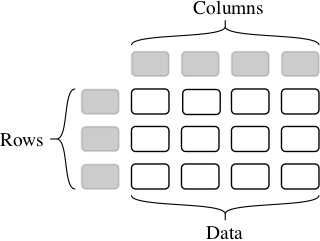

### Loading the Data 

Pandas data frames are normally created by reading the data in from a file. At the time of this writing, Pandas can read in 14 different types of files:
1. Comma-separated values (CSV)
2. XLSX
3. ZIP
4. Plain text (txt)
5. JSON
6. XML
7. HTML
8. Images
9. Hierarchical Data Format
10. PDF
11. DOCX
12. MP3
13. MP4
14. SQL

To illustrate how the process works, we will load a sample `.csv` file. (The file contains information about how patients performed on a particular medical test, as we will see later.) All of the Pandas methods for reading data files begin with the characters `read_`. For `.csv` files the command is `read_csv`.

In [1]:
import pandas as pd
data_path = '../../../05.PythonChapter/Code/ChapterNotebook/'
sample_df = pd.read_csv(data_path + 'SampleDF.csv')

This is a small part of a larger file that was used as part of a Kaggle competition: https://www.kaggle.com/c/osic-pulmonary-fibrosis-progression/data.

### Getting Basic Info

Now that we have loaded a data frame, let's use some simple commmands to investigate its structure and contents. To find the shape of the data frame we can use `shape`.

In [2]:
print(sample_df.shape)

(100, 7)


The DataFrame has 100 rows and 8 columns. We can find the names of the columns using `columns`.

In [ ]:
print(sample_df.columns)

It is also possible to get a description of the DataFrame using the `describe` method.

In [ ]:
print(sample_df.describe())

This provides statistics on all of the numerical columns, including minimum and maximum values, mean and standard deviation, and quartiles.

We can also get some summary information using the `info` method.

In [ ]:
sample_df.info()

It provides information about each of the columns, including the `dtype` and the number of missing cells.

In addition to getting statistics on the DataFrame, we can also look at some parts of the DataFrame by using the `head()` and `tail()` methods. The `head()` method shows the first few rows of the DataFrame, and `tail()` shows the last few rows.

In [ ]:
print(sample_df.head())

### Indexing and Slicing

Data can be extracted from a DataFrame in a number of ways. For example, you can work with a single column. To select the column, provide the column name between braces. The result is a pandas `Series`.

In [ ]:
fvc = sample_df['FVC']
fvc.describe()

If you want to select multiple columns, you can enter a list of column names within the brackets. The returned object is a DataFrame:

In [ ]:
twocol = sample_df[['Age', 'FVC']]
print(twocol.head())

It is also possible to select rows of a DataFrame. For example, you can consider only patients older than 75.

In [ ]:
older = sample_df[sample_df['Age']>75]
print(older.shape)

The condition inside the brackets -- `sample_df['Age']>75` -- checks which rows in the Age column have value greater than 75. The resulting shape shows that there are 8 patients older than 75.

If you want to access a select set of rows and columns, you need to use the `loc/iloc` operators. If you are using column names, row labels or a condition expression, use the `loc` operator. When accessing rows and/or columns based on their position in the table, use the `iloc` operator. For example, if you want to access the `Age` and `FVC` value of patients over 75, you could use the following commands.

In [ ]:
older_fvc = sample_df.loc[sample_df['Age']>75, ['Age', 'FVC']]
print(older_fvc.head())

The part before the comma in the selection bracket represents the rows you want, and the part after the comma represents the columns you want.

Here is an example of using the `iloc` operator to access rows 3 through 5 and columns 2 to 3.

In [ ]:
sample_subset = sample_df.iloc[2:5, 1:3]
print(sample_subset.head())

### Reshaping

It is often useful to reshape a DataFrame in order to make the data compatible with a neural network input or target structure. There are several methods for reshaping DataFrames. We will touch on just a few popular ones.

The pandas `pivot()` method takes three columns of the DataFrame as input arguments and then produces a new data frame that uses the three columns as index, columns and values. For example, we can take the `Patient` column to be the index, the `Weeks` column to be the columns and the `FVC` column to be the values, as in the following.

In [ ]:
pivoted = sample_df.pivot(index='Patient', values = 'FVC', columns='Weeks')
print(pivoted.iloc[:5, :10])

There is a column for every week that is indicated in the data set, and there is a row for every patient. If there is no FVC value for a certain patient in a given week in the original DataFrame, then the cell is filled with `NaN`.

Another reshaping method is `melt()`. It is used to change the DataFrame format from wide to long. One or more of the original columns are used as identifiers, and one or more remaining columns become one value column. For example, we can use `Patient` as the identifier, and `Age` as the value variable.

In [ ]:
melted = sample_df.melt(id_vars='Patient', value_vars='Age')
print(melted.head())

### Operations on DataFrames

Before applying data to neural network training, we often need to perform various preprocessing operations on the data. One way to do this would be to use `for` loops to iterate over the elements of the DataFrame. However there are pandas methods that are much more efficient. A very useful pandas method is `apply()`. It can be used to apply a function along an axis of the DataFrame. There are two arguments to the `apply()` method: the function you want to apply, and the axis you want to apply it to. 

For example, consider the DataFrame `old_fvc` that we created earlier. If we want to find the average `'Age'` and `'FVC'` value, we can apply the NumPy `mean` function to the columns of the DataFrame.

In [ ]:
print(older_fvc.apply(np.mean, axis=0))

In addition to using built-in functions, you can also apply user-defined functions. In the example below we pass a Python **lambda** function to the `apply()` method. The first argument of `apply()` is the function to apply. This can be a built-in function, or a user-defined function. If the function is simple, it can be passed as a `lambda` function, which can be defined inline. A lambda expression consists of the **keyword** `lambda`, followed by the **bound variable** name, followed by a colon, and then completed by the **body** of the function. In the example below the bound variable is `x`, and the body is `x.max() - x.min()`. The `apply()` operation will compute the range of values (max minus min) in each column of the `old` DataFrame.

In [ ]:
print(older_fvc.apply(lambda x: x.max() - x.min(), axis=0))

The `apply()` method can be used to apply any previously defined function to a DataFrame. There are also built-in functions that can be used directly. For example, the `min()` method is applied below to find the minimum value in each column of the data frame.

In [ ]:
print(older_fvc.min(axis=0))

There are many more built-in DataFrame methods, including `max()`, `sum()`, `mean()`, `medium()`, `std()`, etc.